In [20]:
from pathlib import Path
import itertools

import numpy as np
# https://matplotlib.org/gallery/lines_bars_and_markers/curve_error_band.html#sphx-glr-gallery-lines-bars-and-markers-curve-error-band-py
from scipy.interpolate import splprep, splev


import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.collections as mcollections
import matplotlib.colors as mcolors
import matplotlib.path as mpath
import matplotlib.pyplot as plt


import themepy
spath = Path("../")

theme = themepy.Theme('paper')

%matplotlib inline

In [21]:
#shift emojis left
idx1 = [0,1,2]
idx2= [2,0,1]
idx3 = [1,2, 0]
nu1 = {'confused':'😕', 'woozy':'🥴', 'shruggy':'🙃'}
keys = list(nu1.keys())
nu2 = {keys[i]:nu1[keys[i]] for i in idx2}
nu3 = {keys[i]:nu1[keys[i]] for i in idx3}

c1, c2, c3 = 'C2', 'C5', 'C11'
colork = {'confused':c1, 'woozy':c2, 'shruggy':c3}
colorv = {'😕':c1, '🥴':c2, '🙃':c3}


{'confused': '😕', 'woozy': '🥴', 'shruggy': '🙃'}
{'shruggy': '🙃', 'confused': '😕', 'woozy': '🥴'}
{'woozy': '🥴', 'shruggy': '🙃', 'confused': '😕'}


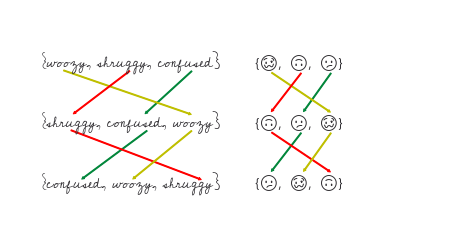

In [22]:
fig, ax = plt.subplots(figsize=(8,4))

for i, nu in enumerate([nu1, nu2, nu3]):
    print(nu)
    ax.text(.2, i/3, f"{{{', '.join(nu.keys())}}}", fontsize=14)
    ax.text(4.5, i/3, f"{{{',  '.join(nu.values())}}}", fontsize=14, fontfamily='Segoe UI Emoji')


#first shuffle
pt = .65
pb = .4
et = .64
eb = .41

p11 = mpatches.FancyArrowPatch((3.25, pt), (2.25, pb), mutation_scale=5, color=colork['confused'])
ax.add_patch(p11) #confused
p12 =  mpatches.FancyArrowPatch((0.6, pt), (3.25, pb), mutation_scale=5, color=colork['woozy'])
ax.add_patch(p12)#woozy
p13 =  mpatches.FancyArrowPatch((2.0, pt), (0.8, pb), mutation_scale=5, color=colork['shruggy'])
ax.add_patch(p13) #shruggy

e11 =  mpatches.FancyArrowPatch((7.75-1.7, et), (7.15-1.7, eb), mutation_scale=5, color=colork['confused'])
ax.add_patch(e11) #confused
e12 = mpatches.FancyArrowPatch((6.5-1.7, et), (7.75-1.7, eb), mutation_scale=5, color=colork['woozy'])
ax.add_patch(e12) #woozy
e13 =  mpatches.FancyArrowPatch((7.15-1.7, et), (6.5-1.7, eb), mutation_scale=5, color=colork['shruggy'])
ax.add_patch(e13) #shruggy


#second shuffle
pt2 = .32
pb2 = .04
et2 = .31
eb2 = .08


p21 = mpatches.FancyArrowPatch( (2.35, pt2), (0.97,pb2) , mutation_scale=5, color=colork['confused'])
ax.add_patch(p21) #confused
p22 =  mpatches.FancyArrowPatch((0.75, pt2), (3.45, pb2), mutation_scale=5, color=colork['shruggy'])
ax.add_patch(p22)#woozy
p23 =  mpatches.FancyArrowPatch((3.25, pt2), (2, pb2), mutation_scale=5, color=colork['woozy'])
ax.add_patch(p23) #shruggy

e21 = mpatches.FancyArrowPatch( (7.15-1.7, et2), (6.5-1.7, eb2) , mutation_scale=5, color=colork['confused'])
ax.add_patch(e21) #confused
e22 =  mpatches.FancyArrowPatch((6.5-1.7, et2), (7.75-1.7, eb2), mutation_scale=5, color=colork['shruggy'])
ax.add_patch(e22)#woozy
e23 =  mpatches.FancyArrowPatch((7.75-1.7, et2), (7.15-1.7, eb2), mutation_scale=5, color=colork['woozy'])
ax.add_patch(e23) #shruggy


ax.set(xlim=(-0.5,8.5), ylim=(-0.2,1))
ax.axis('off')
fig.savefig(spath/"equivariance_nu.png", bbox_inches='tight', facecolor='white' )

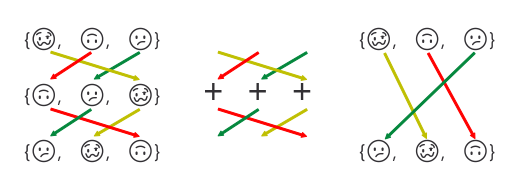

In [23]:
fig, axd = plt.subplot_mosaic([['shift', 'add', 'compose']], 
                                figsize=(9,4.5), 
                                gridspec_kw={'wspace':0, 'hspace':0})
ms = 10

ex = .1
def efmt(nu):
    return f"{{{',   '.join(nu.values())}}}"

text_kw = {'fontsize':20, 'fontfamily':'Segoe UI Emoji'}
for name in ['shift', 'add', 'compose']:
    axd[name].set(xlim=(0,1), ylim=(0,1), aspect='equal')

# two permutations
for i, nu in enumerate([nu1, nu2, nu3]):
    axd['shift'].text(ex, (1/3*i)+.1 ,efmt(nu), 
                      transform = axd['shift'].transData,**text_kw)

first, second, third = 0.25, 0.51, 0.8
def double_arrow(ax):
    top, bottom = .73, .56, 
    e11 =  mpatches.FancyArrowPatch((third, top), (second, bottom), transform=ax.transData,
                                    mutation_scale=ms, color=colork['confused'])
    ax.add_patch(e11) #confused
    e12 = mpatches.FancyArrowPatch((first, top), (third, bottom), transform=ax.transData,
                                   mutation_scale=ms, color=colork['woozy'])
    ax.add_patch(e12) #woozy
    e13 =  mpatches.FancyArrowPatch((second, top), (first, bottom), transform=ax.transData,
                                    mutation_scale=ms, color=colork['shruggy'])
    ax.add_patch(e13)

    top, bottom = .39, .22
    e11 =  mpatches.FancyArrowPatch((third, top), (second, bottom), transform=ax.transData,
                                    mutation_scale=ms, color=colork['woozy'])
    ax.add_patch(e11) #confused
    e12 = mpatches.FancyArrowPatch((first, top), (third, bottom),transform=ax.transData,
                                   mutation_scale=ms, color=colork['shruggy'])
    ax.add_patch(e12) #woozy
    e13 =  mpatches.FancyArrowPatch((second, top), (first, bottom), transform=ax.transData,
                                    mutation_scale=ms, color=colork['confused'])
    ax.add_patch(e13)

double_arrow(axd['shift'])
# composite permutation
middle = ['+', '+', '+']
for i, nu in enumerate([nu1, middle, nu3]):
    text = " +  +  +  " if i == 1 else ""
    text_kw['fontsize'] = 36 if i == 1 else 20
    axd['add'].text(ex, (1/3*i)+.1 ,text , **text_kw)
double_arrow(axd['add'])

def efmt(nu):
    return f"{{{',   '.join(nu.values())}}}"

for i, nu in enumerate([nu1, nu2, nu3]):
    if i==1: continue
    axd['compose'].text(ex, (1/3*i)+.1 , efmt(nu), transform = axd['compose'].transData,**text_kw)
                    
top, bottom = .73, .2
e11 =  mpatches.FancyArrowPatch((first, top), (second, bottom), transform=axd['compose'].transData,
                                mutation_scale=ms, color=colork['woozy'])
axd['compose'].add_patch(e11) #confused
e12 = mpatches.FancyArrowPatch((second, top), (third, bottom),transform=axd['compose'].transData,
                               mutation_scale=ms, color=colork['shruggy'])
axd['compose'].add_patch(e12) #woozy
e13 =  mpatches.FancyArrowPatch((third, top), (first, bottom), transform=axd['compose'].transData,
                                mutation_scale=ms, color=colork['confused'])
axd['compose'].add_patch(e13)


for name in axd:
    axd[name].axis('off')
fig.savefig(spath/"monoid_emoji.png", bbox_inches='tight', facecolor='white' )

(0.0, 1.5, 0.0, 1.0)

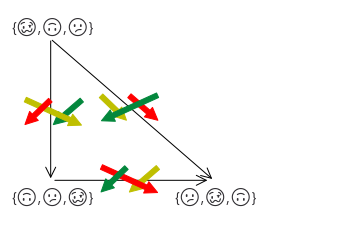

In [24]:
fig, axd = plt.subplot_mosaic([['triangle']])
c1 = .2
c2y = .85
c2x = .95
acolor = 'black'
lw=.5
ms=25
av = mpatches.FancyArrowPatch((c1, c2y), (c1, c1), arrowstyle='->', mutation_scale=ms,color=acolor)
axd['triangle'].add_patch(av)
ah = mpatches.FancyArrowPatch((c1+.01, c1), (c2x-.02, c1),arrowstyle='->', mutation_scale=ms, color=acolor)
axd['triangle'].add_patch(ah)
ad = mpatches.FancyArrowPatch((c1, c2y), (c2x, c1),arrowstyle='->', mutation_scale=ms, color=acolor)
axd['triangle'].add_patch(ad)


yshift = .1
xshift = .18
text_kw['fontsize']=16

def efmt2(nu):
    return f"{{{','.join(nu.values())}}}"

axd['triangle'].text(c1-xshift, c2y+.03 , efmt2(nu3), **text_kw, transform=axd['triangle'].transData) #ul
axd['triangle'].text(c1-xshift, c1-yshift, efmt2(nu2), **text_kw, transform=axd['triangle'].transData) #ll
axd['triangle'].text(c2x-xshift, c1-yshift, efmt2(nu1), **text_kw, transform=axd['triangle'].transData) #lr
axd['triangle'].set(aspect='equal', xlim=(0, 1.5))

ms = 25
originx = np.array([0.25, 0.51, 0.8])*.5
originy = np.array([.75, .5])*.5

# first translation

first, second, third = originx -.05
top, bottom = originy + .2
e11 =  mpatches.FancyArrowPatch((third, top), (second, bottom), transform=axd['triangle'].transData,
                                mutation_scale=ms, color=colork['confused'])
axd['triangle'].add_patch(e11) #confused
e12 = mpatches.FancyArrowPatch((first, top), (third, bottom), transform=axd['triangle'].transData,
                               mutation_scale=ms, color=colork['woozy'])
axd['triangle'].add_patch(e12) #woozy
e13 =  mpatches.FancyArrowPatch((second, top), (first, bottom), transform=axd['triangle'].transData,
                                mutation_scale=ms, color=colork['shruggy'])
axd['triangle'].add_patch(e13)

#second translation
first, second, third = originx +.3
top, bottom = originy - .11
e11 =  mpatches.FancyArrowPatch((third, top), (second, bottom), transform=axd['triangle'].transData,
                                mutation_scale=ms, color=colork['woozy'])
axd['triangle'].add_patch(e11) #confused
e12 = mpatches.FancyArrowPatch((first, top), (third, bottom),transform=axd['triangle'].transData,
                               mutation_scale=ms, color=colork['shruggy'])
axd['triangle'].add_patch(e12) #woozy
e13 =  mpatches.FancyArrowPatch((second, top), (first, bottom), transform=axd['triangle'].transData,
                                mutation_scale=ms, color=colork['confused'])
axd['triangle'].add_patch(e13)
# third translation
first, second, third = originx +.3
top, bottom = originy + .22
e11 =  mpatches.FancyArrowPatch((first, top), (second, bottom), transform=axd['triangle'].transData,
                                mutation_scale=ms, color=colork['woozy'])
axd['triangle'].add_patch(e11) #confused
e12 = mpatches.FancyArrowPatch((second, top), (third, bottom),transform=axd['triangle'].transData,
                               mutation_scale=ms, color=colork['shruggy'])
axd['triangle'].add_patch(e12) #woozy
e13 =  mpatches.FancyArrowPatch((third, top), (first, bottom), transform=axd['triangle'].transData,
                                mutation_scale=ms, color=colork['confused'])
axd['triangle'].add_patch(e13)

axd['triangle'].axis('off')

In [25]:
nu_po = nu.copy()

In [26]:
nu_po['silent'] = '😶'

In [27]:
nu_po['mask'] = '😷'

In [28]:
nu_po

{'woozy': '🥴', 'shruggy': '🙃', 'confused': '😕', 'silent': '😶', 'mask': '😷'}

In [57]:
def hasse(ax,xpos, ypos, nu,  ms=10, xpad=.05, tc='k', ac='C8'):
    r,c, l = xpos
    b, m1, m2, t = ypos
    ax.text(c, t,  nu['mask'], color=tc, **text_kw)
    ax.text(c, m2, nu['shruggy'], color=tc,   **text_kw)
    ax.text(r, m1, nu['woozy'],  color=tc,   **text_kw,)
    ax.text(l, m1, nu['confused'], color=tc,   **text_kw)
    ax.text(c, b, nu['silent'],  color=tc,   **text_kw)

    graph = [[(c,b)],[(r, m1), (l, m1)], [(c,m2)], [(c,t)]]
    for i, nodes in enumerate(graph[:-1]):
        for bottom in nodes:
            for top in graph[i+1]:
                source = bottom[0]+xpad, bottom[1]+.075
                target = top[0]+xpad, top[1]-.025
                e = mpatches.FancyArrowPatch(source, target, transform=ax.transData, mutation_scale=ms)
                ax.add_patch(e)

    #ax.set(ylim=(0, 1.05), xlim=(.2, .9), aspect='equal', xticks=[], yticks=[], facecolor='white')


In [58]:
def preorder(ax, xpos, ypos, ms=10, xpad=.05, tc='k', ac='C8'):
    r,c, l = xpos
    b, m1, m2, t = ypos
    m = m1+(m2-m1)/2
    ax.text(c-.02, t-.05, "?", fontsize=20, color=tc)
    ax.text(c-.075, m,"tilted", fontsize=20, color=tc)
    ax.text(c-.14, b, "missing", fontsize=20, color=tc)

    e1 = mpatches.FancyArrowPatch((c,b+.03) ,(c,m) , transform=ax.transData, mutation_scale=ms)
    ax.add_patch(e1)
    e2 = mpatches.FancyArrowPatch((c,m+.05), (c,t-.06), transform=ax.transData, mutation_scale=ms)
    ax.add_patch(e2)
    #ax.set(xticks=[], yticks=[], facecolor='white')


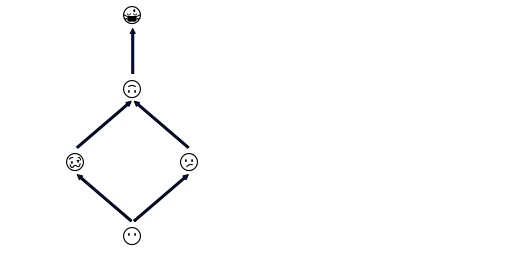

In [60]:
fig, axd = plt.subplot_mosaic([['hasse', "preorder"]],   figsize=(9,4.5))
r, c, l = .25, .5, .75
b, m1, m2, t = .05, .35, .65, .95
hasse(axd['hasse'], (r,c,l), (b, m1, m2, t), nu_po)
axd['hasse'].axis('off')
axd['preorder'].axis('off')
fig.savefig(spath/"monoid_hasse.png", bbox_inches='tight', facecolor='white' )

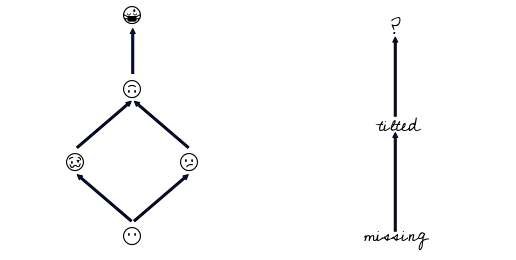

In [61]:
fig, axd = plt.subplot_mosaic([['hasse', 'preorder']],   figsize=(9,4.5))
r, c, l = .25, .5, .75
b, m1, m2, t = .05, .35, .65, .95
tc = 'k'
ac = 'C8'
hasse(axd['hasse'], (r,c,l), (b, m1, m2, t), nu_po)
preorder(axd['preorder'], (r,c,l), (b, m1, m2, t))
axd['hasse'].axis('off')
axd['preorder'].axis('off')
fig.savefig(spath/"monoid_monotone.png", bbox_inches='tight', facecolor='white' )

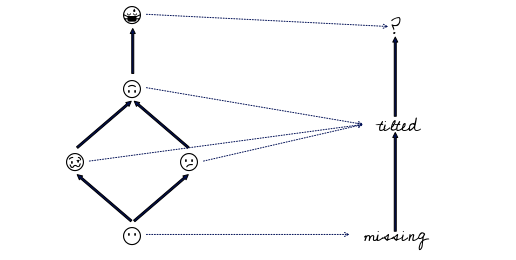

In [62]:
fig, axd = plt.subplot_mosaic([['hasse', 'preorder']],  figsize=(9,4.5))
r, c, l = .25, .5, .75
b, m1, m2, t = .05, .35, .65, .95
m = m1+(m2-m1)/2
tc = 'k'
ac = 'C8'
hasse(axd['hasse'], (r,c,l), (b, m1, m2, t), nu_po)
preorder(axd['preorder'], (r,c,l), (b, m1, m2, t))

graph = [((c,b), (c,b)), ((r,m1), (c,m)), ((l, m1), (c,m)), ((c,m2), (c,m)), ((c,t), (c,t))]
for i, (source, target) in enumerate(graph):
    sx, sy = source[0] + .11, source[1]+.025
    if i == 0:
        txp, typ = .2, .025
    elif i in [1,2,3]:
        txp, typ = .14, .025
    else:
        txp, typ = 0.03, -0.025
    tx, ty = target[0]-txp, target[-1]+typ
    con = mpatches.ConnectionPatch(xyA=(sx, sy), coordsA=axd['hasse'].transData,
                                 xyB=(tx, ty), coordsB=axd['preorder'].transData, arrowstyle="->", linestyle=':', color='C0')
    fig.add_artist(con)
axd['hasse'].axis('off')
axd['preorder'].axis('off')
fig.savefig(spath/"monoid_maps.png", bbox_inches='tight', facecolor='white' )

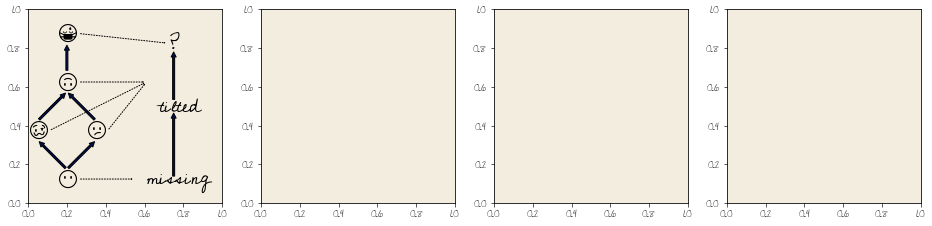

In [69]:
fig, axd =   plt.subplot_mosaic([['data', 'identity', 'preserve', 'invalid']], figsize=(16,4))
for ax in axd.values():
    ax.set(aspect='equal', xlim=(0,1), ylim=(0,1))
    
r, c, l = .0, .15, .3
b, m1, m2, t = .1, .35, .6, .85
m = m1+(m2-m1)/2
tc = 'k'
ac = 'C8'
hasse(axd['data'], (r,c,l), (b, m1, m2, t), nu_po)
b2, m12, m22, t2 = .1, .35, .6, .85
r2, c2, l2 = .0, .75, .5
preorder(axd['data'], (r2,c2,l2), (b2, m12, m22, t2))

graph = [((c,b), (c2,b2)), ((r,m1), (c2,m2)), ((l, m1), (c2,m2)), ((c,m2), (c2,m2)), ((c,t), (c2,t2))]
for i, (source, target) in enumerate(graph):
    sx, sy = source[0] + .11, source[1]+.025
    if i == 0:
        txp, typ = .2, .025
    elif i in [1,2,3]:
        txp, typ = .14, .025
    else:
        txp, typ = 0.03, -0.025
    tx, ty = target[0]-txp, target[-1]+typ
    e = mpatches.FancyArrowPatch((sx,sy), (tx,ty), transform=axd['data'].transData,arrowstyle="->", linestyle=':')
    axd['data'].add_patch(e)
